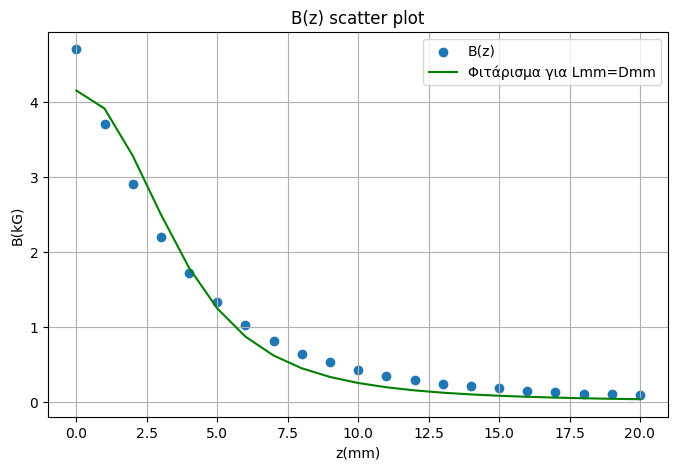

array([9.27972807, 4.00221988])

In [5]:

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt



# Provided data points
x_data = np.arange(21)
y_data = np.array([4.7, 3.7, 2.9, 2.2, 1.72, 1.33, 1.03, 0.81, 0.64, 0.53, 0.42, 0.34, 0.29, 0.24, 0.21, 0.18, 0.15, 0.13, 0.11, 0.1, 0.09])

# Define the model function
def model(x, a, b, c):
    return (a / 2) * (((x + (b / 2)) / (np.sqrt((x + (b / 2))**2 + c**2))) - ((x - (b / 2)) / (np.sqrt((x - (b / 2))**2 + c**2))))

# Fit the model to the data
#params, params_covariance = curve_fit(model, x_data, y_data, p0=[1, 1, 1])



# Adjust the model to consider b = c
def model_b_equals_c(x, a, b):
    return (a / 2) * (((x + (b / 2)) / (np.sqrt((x + (b / 2))**2 + b**2))) - ((x - (b / 2)) / (np.sqrt((x - (b / 2))**2 + b**2))))

# Try to fit the model again with the assumption that b = c
params_b_equals_c, params_covariance_b_equals_c = curve_fit(model_b_equals_c, x_data, y_data, p0=[1, 1])

# Plot the data and the fitted curve with b = c
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='B(z)')
plt.plot(x_data, model_b_equals_c(x_data, *params_b_equals_c), label='Φιτάρισμα για Lmm=Dmm', color='green')
plt.legend()
plt.xlabel('z(mm)')
plt.ylabel('B(kG)')
plt.title('B(z) scatter plot')
plt.grid(True)
plt.show()

params_b_equals_c


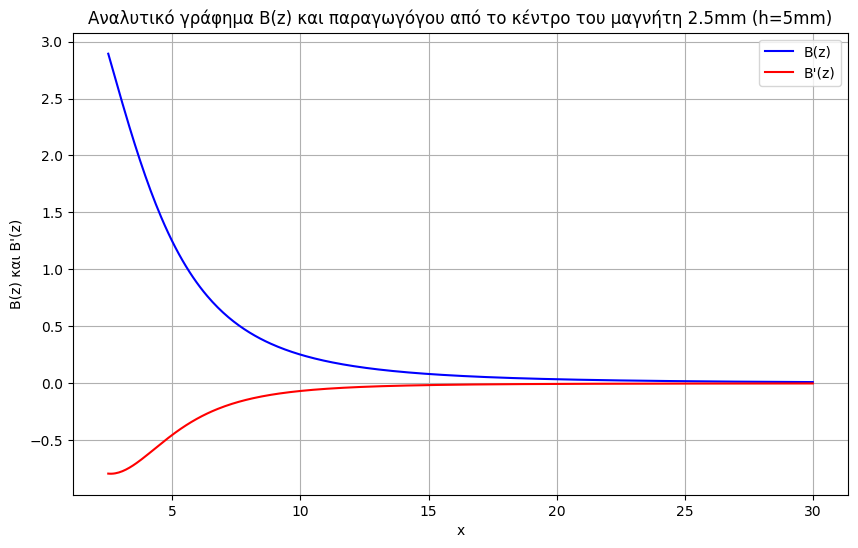

(-1.15932261947587*(x - 2.00110994)/sqrt(0.25*(0.499722668910435*x - 1)**2 + 1) + 1.15932261947587*(x + 2.00110994)/sqrt(0.25*(0.499722668910435*x + 1)**2 + 1),
 -1.15932261947587*(0.124930667227609 - 0.062430686455742*x)*(x - 2.00110994)/(0.25*(0.499722668910435*x - 1)**2 + 1)**(3/2) + 1.15932261947587*(-0.062430686455742*x - 0.124930667227609)*(x + 2.00110994)/(0.25*(0.499722668910435*x + 1)**2 + 1)**(3/2) + 1.15932261947587/sqrt(0.25*(0.499722668910435*x + 1)**2 + 1) - 1.15932261947587/sqrt(0.25*(0.499722668910435*x - 1)**2 + 1))

In [13]:
from sympy import symbols, diff, sqrt

# Define the symbols
x, a, b = symbols('x a b')

# Define the function with the found values for a and b=c
function = (a / 2) * (((x + (b / 2)) / (sqrt((x + (b / 2))**2 + b**2))) - ((x - (b / 2)) / (sqrt((x - (b / 2))**2 + b**2))))

# Substitute the found values into the function
function_substituted = function.subs({a: 9.27972807, b: 4.00221988})

# Calculate the derivative of the function
derivative = diff(function_substituted, x)

# Plot the function and its derivative
x_values = np.linspace(2.5, 30, 400)
f_values = [function_substituted.subs(x, xv).evalf() for xv in x_values]
df_values = [derivative.subs(x, xv).evalf() for xv in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values, label='B(z)', color='blue')
plt.plot(x_values, df_values, label='B\'(z)', color='red')
plt.title('Αναλυτικό γράφημα B(z) και παραγωγόγου από το κέντρο του μαγνήτη 2.5mm (h=5mm)')
plt.xlabel('x')
plt.ylabel('B(z) και B\'(z)')
plt.legend()
plt.grid(True)
plt.show()

function_substituted, derivative


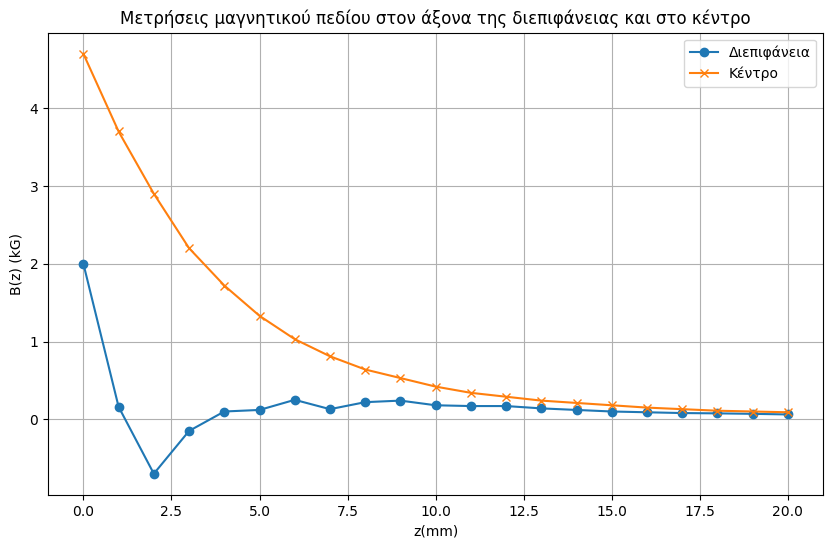

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the two datasets
data1 = [2, 0.16, -0.7, -0.15, 0.1, 0.12, 0.25, 0.13, 0.22, 0.24, 0.18, 0.17, 0.17, 0.14, 0.12, 0.1, 0.09, 0.08, 0.076, 0.07, 0.062]
data2 = [4.7, 3.7, 2.9, 2.2, 1.72, 1.33, 1.03, 0.81, 0.64, 0.53, 0.42, 0.34, 0.29, 0.24, 0.21, 0.18, 0.15, 0.13, 0.11, 0.1, 0.09]

# Creating DataFrame
df = pd.DataFrame({
    'Dataset 1': data1,
    'Dataset 2': data2
})

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Dataset 1'], label='Διεπιφάνεια', marker='o')
plt.plot(df['Dataset 2'], label='Κέντρο', marker='x')
plt.title('Μετρήσεις μαγνητικού πεδίου στον άξονα της διεπιφάνειας και στο κέντρο')
plt.xlabel('z(mm)')
plt.ylabel('B(z) (kG)')
plt.legend()
plt.grid(True)
plt.show()
